<a href="https://colab.research.google.com/github/cshooon/Data_Analysis/blob/main/TreeBasedMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.precision', 4)
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format)

plt.style.use('seaborn')

<ipython-input-2-ac47f1cb50bd>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 8.3.1 Fitting Classification Trees

In [ ]:
carseats = pd.read_csv('/content/drive/MyDrive/Carseats.csv', index_col=0)
carseats['High'] = (carseats['Sales']>8).map({True: 'Yes', False: 'No'})
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical)
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50000,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22000,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06000,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,7.40000,117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,4.15000,141,64,3,340,128,Bad,38,13,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.57000,138,108,17,203,128,Good,33,14,Yes,Yes,Yes
397,6.14000,139,23,3,37,120,Medium,55,11,No,Yes,No
398,7.41000,162,26,12,368,159,Medium,40,18,Yes,Yes,No
399,5.94000,100,79,7,284,95,Bad,50,12,Yes,Yes,No


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

X = carseats.loc[:,'CompPrice':'US']
y = carseats.loc[:, 'High']
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50000,138,73,11,276,120,0,42,17,1,1,Yes
2,11.22000,111,48,16,260,83,1,65,10,1,1,Yes
3,10.06000,113,35,10,269,80,2,59,12,1,1,Yes
4,7.40000,117,100,4,466,97,2,55,14,1,1,No
5,4.15000,141,64,3,340,128,0,38,13,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.57000,138,108,17,203,128,1,33,14,1,1,Yes
397,6.14000,139,23,3,37,120,2,55,11,0,1,No
398,7.41000,162,26,12,368,159,2,40,18,1,1,No
399,5.94000,100,79,7,284,95,0,50,12,1,1,No


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth = 6)
tree_carseats.fit(X,y)
y_pred = tree_carseats.predict(X)

tree_carseats.score(X,y)

0.8775

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


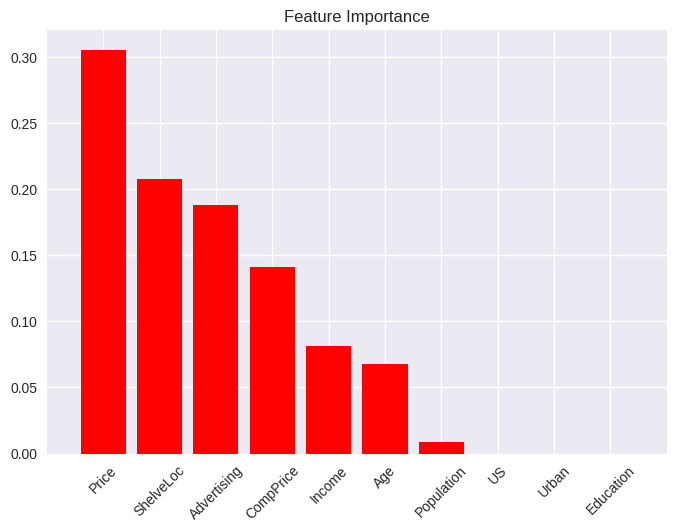

In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats,
                        feature_names=X.columns,
                        x_tick_rotation=45);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, test_size=0.5, random_state=42)

tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train, y_train)
y_pred = tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_train, y_train), tree_carseats_tt.score(X_test, y_test)

(0.9, 0.73)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.71      0.75       117
         Yes       0.65      0.76      0.70        83

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



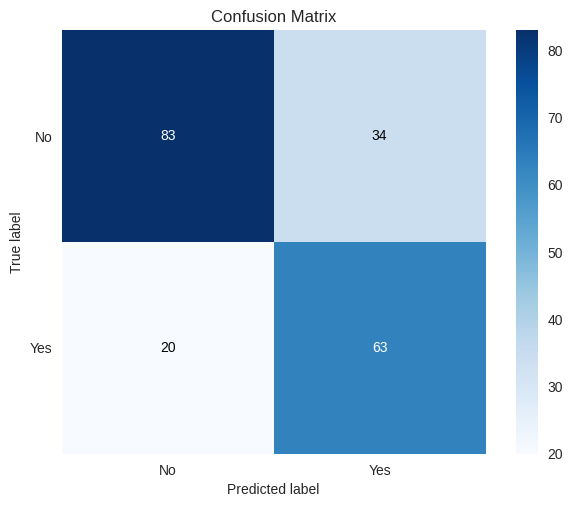

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test,y_pred);

# 8.3.2 Fitting Regression Trees

In [ ]:
boston = pd.read_csv('/content/drive/MyDrive/Boston.csv', index_col=0)

X = boston.loc[:,'crim':'lstat']
y = boston.loc[:, 'medv']

boston

,crim,zn,indus,chas,nox,rm,...,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.00000,2.31000,0,0.53800,6.57500,...,1,296,15.30000,396.90000,4.98000,24.00000
2,0.02731,0.00000,7.07000,0,0.46900,6.42100,...,2,242,17.80000,396.90000,9.14000,21.60000
3,0.02729,0.00000,7.07000,0,0.46900,7.18500,...,2,242,17.80000,392.83000,4.03000,34.70000
4,0.03237,0.00000,2.18000,0,0.45800,6.99800,...,3,222,18.70000,394.63000,2.94000,33.40000
5,0.06905,0.00000,2.18000,0,0.45800,7.14700,...,3,222,18.70000,396.90000,5.33000,36.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.00000,11.93000,0,0.57300,6.59300,...,1,273,21.00000,391.99000,9.67000,22.40000
503,0.04527,0.00000,11.93000,0,0.57300,6.12000,...,1,273,21.00000,396.90000,9.08000,20.60000
504,0.06076,0.00000,11.93000,0,0.57300,6.97600,...,1,273,21.00000,396.90000,5.64000,23.90000
505,0.10959,0.00000,11.93000,0,0.57300,6.79400,...,1,273,21.00000,393.45000,6.48000,22.00000


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, test_size=0.5, random_state=42)

tree_boston = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_train, y_train), tree_boston.score(X_test, y_test)

(0.7461422238084278, 0.6349503884695384)

# 8.3.3 Bagging and Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42)
boston_bag.fit(X_train, y_train)

y_pred = boston_bag.predict(X_test)

mean_squared_error(y_test, y_pred)

14.667482976284576

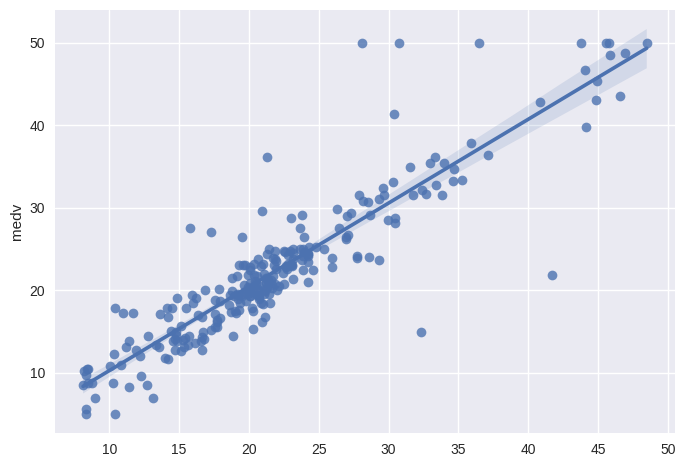

In [ ]:
sns.regplot(x=y_pred, y=y_test);

In [ ]:
boston_rf = RandomForestRegressor(max_features=6, random_state=42, n_estimators=100)
boston_rf.fit(X_train, y_train)

y_pred = boston_rf.predict(X_test)

mean_squared_error(y_test, y_pred)

12.878658150197625

<Axes: ylabel='medv'>

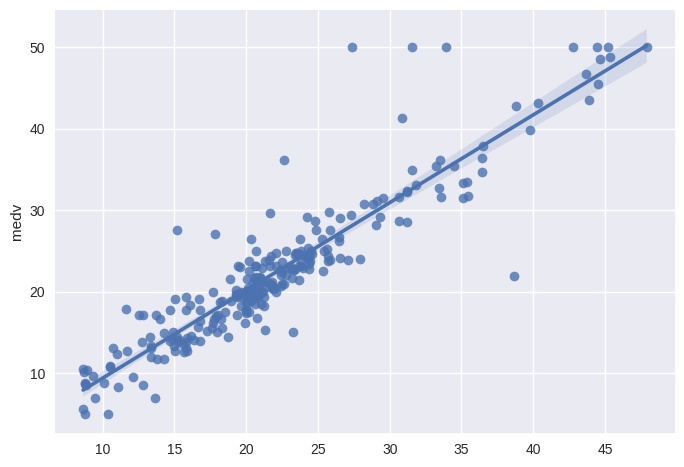

In [ ]:
sns.regplot(x=y_pred, y=y_test)

# 8.3.4 Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)
boston_gb.fit(X_train, y_train)

y_pred = boston_gb.predict(X_test)

mean_squared_error(y_test, y_pred)

16.770864624119454

<Axes: title={'center': 'Feature Importance'}>

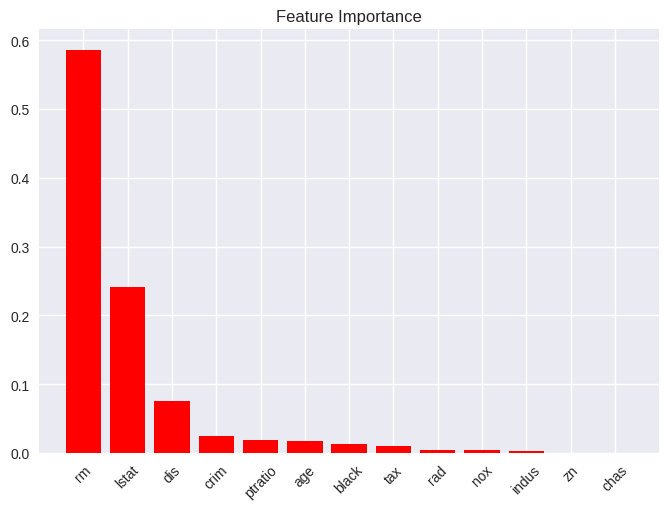

In [ ]:
plot_feature_importances(boston_gb,
                        feature_names=X.columns,
                        x_tick_rotation=45)

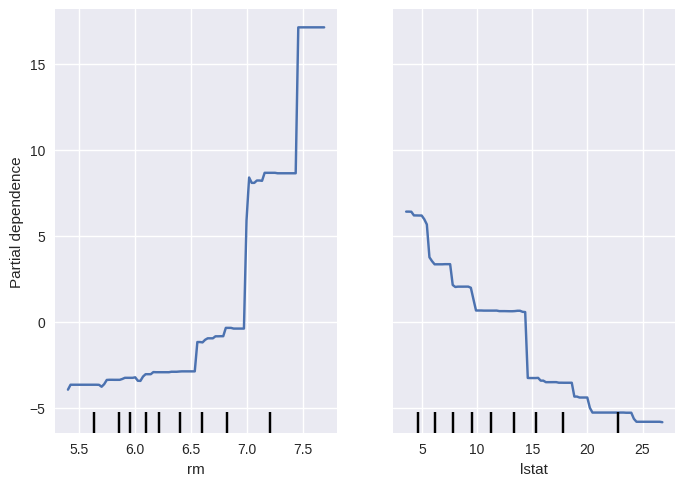

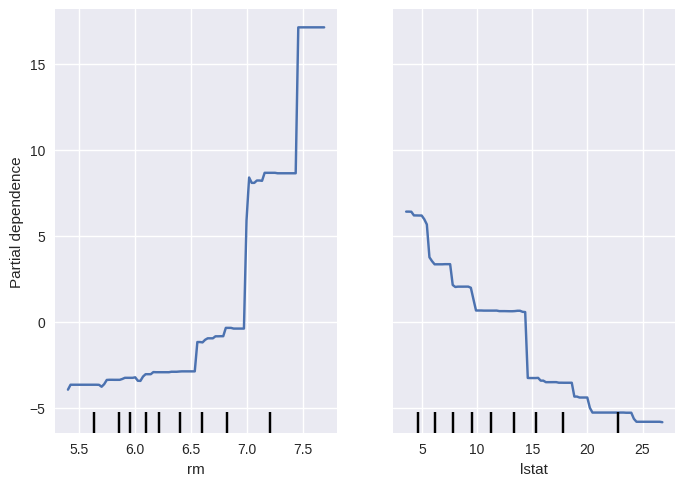

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(boston_gb, X_train, [5, 12])
display.plot()

In [ ]:
boston_gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=4, random_state=42)
boston_gb2.fit(X_train, y_train)

y_pred = boston_gb2.predict(X_test)

mean_squared_error(y_test, y_pred)

16.819090763984708

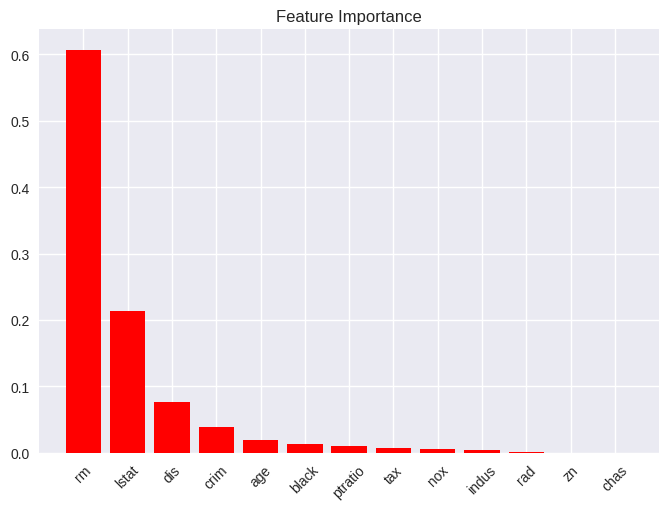

In [ ]:
plot_feature_importances(boston_gb2,
                        feature_names=X.columns,
                        x_tick_rotation=45);